# Overview

We're now switching focus away from the Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on Reddit, because subbmisions and comments often contain text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> **_Video Lecture_**. [Intro to Natural Language processing](https://www.youtube.com/watch?v=Ph0EHmFT3n4). Today is all about working with NLTK, so not much lecturing - we will start with a perspective on text analysis by Sune (you will hear him talking about Wikipedia data here and there. Everything he sais applies to Reddit data as well!)

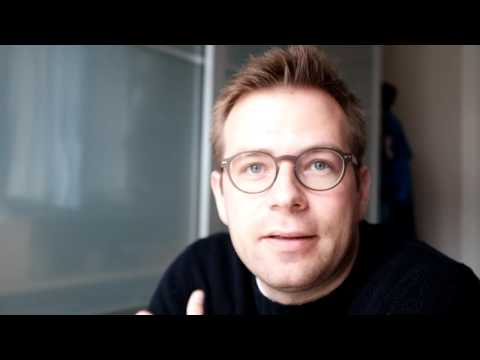

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)

# Installing and the basics

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1.1, 1.2, 1.3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a `notebook`. 
 

### NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks: In the iPython notebook, run the code 

     import nltk
     nltk.download()

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

In [3]:
import nltk

> *Exercises: NLPP Chapter 1 (the stuff that might be due in an upcoming assignment).
> 
> The following exercises from Chapter 1 are what might be due in an assignment later on.
>
> * Try out the `concordance` method, using another text and a word of your own choosing.
> * Also try out the `similar` and `common_context` methods for a few of your own examples.
> * Create your own version of a dispersion plot ("your own version" means another text and different word).
> * Explain in your own words what aspect of language _lexical diversity_ describes. 

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
> * Work through ex 2-12 in NLPP's section 1.8\. 
> * Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8\. 

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [16]:
text8.concordance('heavy')

no matches


In [18]:
text2.similar('a'), text3.similar('a')

the her his so this that as no your one my every some any too their
very with another all
the his this my that thy to every their man heaven earth darkness of
deep waters said day night evening


(None, None)

In [19]:
text3.common_contexts(['a','the'])

for_burnt and_young by_well of_field of_tree and_tree forth_dove
of_flood of_covenant and_tower unto_land in_land by_fountain in_cave
of_well of_month with_good took_stone prison_place out_man


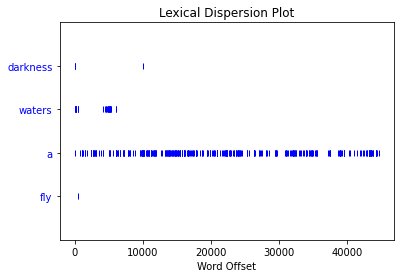

In [20]:
text3.dispersion_plot(['darkness','waters','a','fly'])

Lexical diversity is defined as the amount of unique words in a text divived by the total number of words in the text. Thus it tells us something about how many words we have to read before we expect to have encountered a unique word on average.

> * Create frequency distributions for `text2`, including the cumulative frequency plot for the 75 most common words.

In [25]:
word_counts = dict(zip(set(text3),[text3.count(word) for word in set(text3)]))

In [50]:
import numpy as np
sort_idx = np.argsort(list(word_counts.values()))
words = np.array(list(set(text3)))
N = 75
N_most_frequent_words = words[sort_idx[len(sort_idx)-N:]]
frequencies = [word_counts[word]/len(text3) for word in N_most_frequent_words]

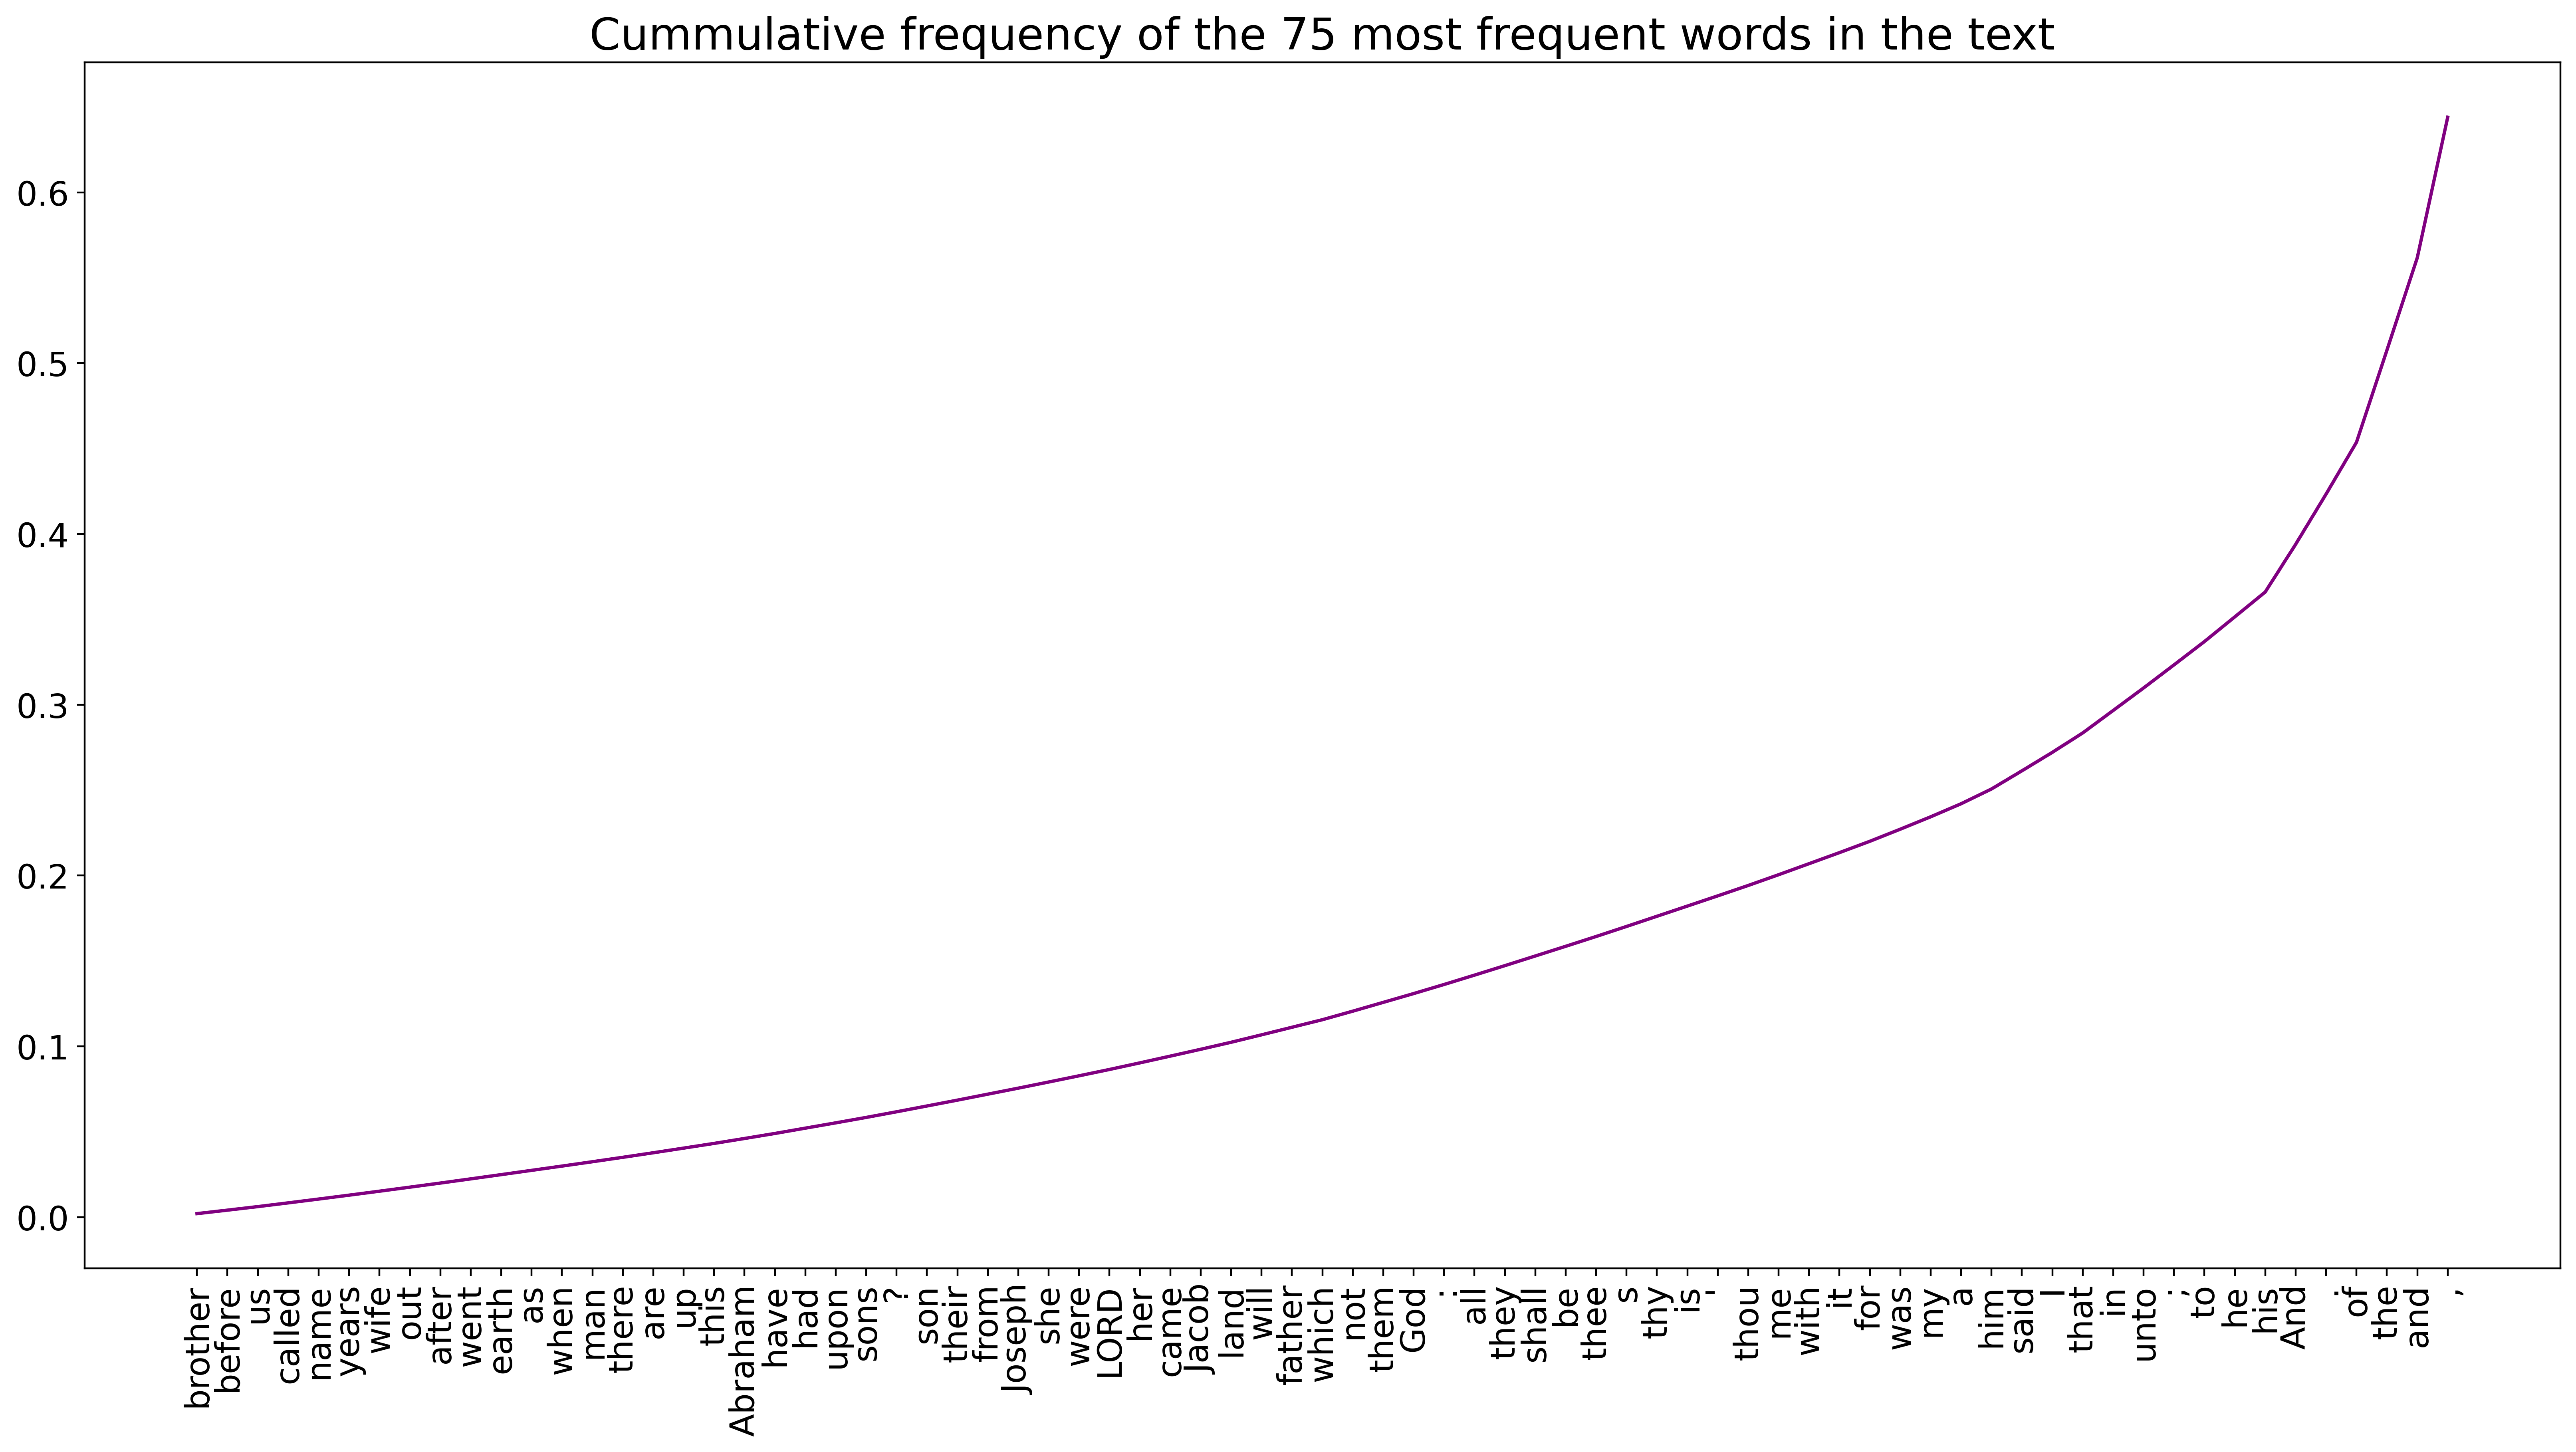

In [74]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20,10),dpi=400)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
ax.plot(N_most_frequent_words,np.cumsum(frequencies),'-',color='purple')
plt.title(label=f'Cummulative frequency of the {N} most frequent words in the text', fontdict={'fontsize': 20});

# Working with NLTK and other types of text

Chapter 2 in NLPP1e is all about getting access to nicely curated texts that you can find built into NLTK. 
> 
> Reading: NLPP Chapter 2.1 - 2.4\.

> *Exercises*: NLPP Chapter 2\.
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP1e, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> 